In [1]:
import numpy as np
from typing import Optional, Tuple
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.ticker import ScalarFormatter
from ipywidgets import interact, FloatSlider, Dropdown
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)
%matplotlib widget

# Exercise 1.1: Electromagnetic Waves in Conducting Materials

Maxwell's equations describe the behavior of electromagnetic fields in matter. In differential form, they are given by:

$\nabla \times \vec{E}\left(\vec{r},t\right) = -\dfrac{\partial }{\partial t}\vec{B}\left(\vec{r},t\right)$

$\nabla \times \vec{H}\left(\vec{r},t\right) = \vec{j}\left(\vec{r},t\right) + \dfrac{\partial }{\partial t}\vec{D}\left(\vec{r},t\right)$

$\nabla \cdot \vec{D}\left(\vec{r},t\right) = \rho_{ext}\left(\vec{r},t\right)$

$\nabla \cdot \vec{B}\left(\vec{r},t\right) = 0$


When dealing with matter, Maxwell's equations can be expressed in terms of the four macroscopic fields:

* Electric field $\vec{E}\left(\vec{r},t\right)$
* Magnetic flux density $\vec{B}\left(\vec{r},t\right)$
* Electric displacement field $\vec{D}\left(\vec{r},t\right)$
* Magnetic field $\vec{H}\left(\vec{r},t\right)$

Further, these equations depend on the external charge density $\rho_{ext}\left(\vec{r},t\right)$ and the current density $\vec{j}\left(\vec{r},t\right)$ and are linked to the material properties of the medium by the following relations:

$\vec{D}\left(\vec{r},t\right) = \epsilon_0\epsilon_r \vec{E}\left(\vec{r},t\right)$

$\vec{B}\left(\vec{r},t\right) = \mu_0\mu_r \vec{H}\left(\vec{r},t\right)$

1. **Vacuum**: In vacuum, $\epsilon_r = \mu_r = 1$ and $\rho_{ext} = \vec{j} = 0$. Substituting this in the above eqations and solving for the fields, we get: $ \dfrac{\partial^2}{\partial t^2}\vec{E}\left(\vec{r},t\right) - \mathrm{c}^2 \cdot \nabla^2\vec{E}\left(\vec{r},t\right) = 0$, where $\mathrm{c} = \dfrac{1}{\sqrt{\epsilon_0\mu_0}}$ is the speed of light in vacuum. This is the wave equation for the electric field in vacuum. The same equation can be derived for the magnetic field. The general solution of the wave equation in the far field (= plane wave) is given as: $\vec{E}\left(\vec{r},t\right) = \vec{E}_0 \exp({i\left(\vec{k}\cdot\vec{r} - \omega t\right)})$, where $\vec{E}_0$ is the electric field amplitude, $\vec{k}$ is the wave vector and $\omega$ is the angular frequency. The wave vector is related to the angular frequency by the dispersion relation: $\omega = \mathrm{c}\left|\vec{k}\right|$. The wave vector is perpendicular to the wave front and points in the direction of wave propagation. The wave vector is related to the wavelength $\lambda$ by $\left|\vec{k}\right| = \dfrac{2\pi}{\lambda}$.

2. **Non-Conducting Isotropic Medium (Dielectric)**: In a non-conducting isotropic medium, $\epsilon_r$ and $\mu_r$ are constants (related to valence band electrons a.k.a. bounded electrons) and $\rho_{ext}$ and $\vec{j}$ depend on the freely movable charges contained in the medium (conduction band electrons). Substituting this in the above eqations and solving for the fields, we get: $\dfrac{\partial^2}{\partial t^2}\vec{E}\left(\vec{r},t\right) - v_g^2 \cdot \nabla^2\vec{E}\left(\vec{r},t\right) = 0$, where $v_g = \dfrac{\mathrm{c}}{\mu_r\epsilon_r}$ is the (group) propagation velocity of the emw inside the medium. The scaling factor is reffered to as the refractive index of the material $n = \dfrac{1}{\epsilon_r\mu_r}.$ As $k$ is related to propagation velocity of the emw, inside a material the effective wavenumber has to be rescaled in regards to the vacuum wavenumber via the aforementioend refractive index, too: $k_{medium} = k = k_0 \cdot n$. The same general solution of the wave equation in the far field (= plane wave) as above still holds valid, though the dielectric properties have to be accoutned for via the effective wave number: $\vec{E}\left(\vec{r},t\right) = \vec{E}_0 \exp\left({i\left(\vec{k_0}n\cdot\vec{r} - \omega t\right)}\right)$. It goes without saying, that just as the wavenumber, also the wavelength is modified as $\lambda_{medium} = \lambda = \dfrac{\lambda_0}{n}$, effectively blue-shifting the emw. Beyond what is described here, the refractive index also has an impact on the polarization and propagation direction of the emw, which is not discussed here.

3. **Conducting Isotropic Medium**: In a conducting isotropic medium, $\epsilon_r$ and $\mu_r$ are constants (related to valence band electrons a.k.a. bounded electrons) and $\rho_{ext}$ and $\vec{j}$ depend on the freely movable charges contained in the medium (conduction band electrons). Further, the electric current density is induced in the material through the incident emw and because of its interaction with the free electrons in the material, resulting in a conductivity $\sigma$, as described in the microscopic form of Ohm's law: $\vec{j} = \sigma \cdot \vec{E}$. This incudec current is accoutned for in the second Maxwell equation above. This equation can now be rewritten in terms of the electric field: $\nabla \times \vec{H} = \vec{j} + \dfrac{\partial }{\partial t}\vec{D} = \sigma\vec{E} + i\omega\epsilon_0\epsilon_r\vec{E} = i\omega\epsilon_0\left(\epsilon_r - i\dfrac{\sigma}{\omega\epsilon_0}\right)\vec{E}$. Thus, a complex relative permittivity is defined as $\tilde{\epsilon_r} = \epsilon_r - i\dfrac{\sigma}{\omega\epsilon_0} = \epsilon^{\prime}_r + i\epsilon^{\prime\prime}_r$. Consequently also the refractive index becomes complex as $\tilde{n} = n^{\prime} + i n^{\prime\prime}$. Further, unsurpsirsingly the wavenumber becomes complex, too: $k_{medium} = k = k_0n^{\prime} + i k_0n^{\prime\prime}$. Substituting this in the above eqations and solving for the fields, we get: $\dfrac{\partial^2}{\partial t^2}\vec{E}\left(\vec{r},t\right) - \dfrac{\sigma}{\tilde{\epsilon}_r\epsilon_0} \dfrac{\partial}{\partial t}\vec{E}\left(\vec{r},t\right) - v_g^2 \cdot \nabla^2\vec{E}\left(\vec{r},t\right) = 0$. The solution of this equation is given as: $\vec{E}\left(\vec{r},t\right) = \vec{E}_0 \exp\left({i\left(\vec{k}^{\prime}\vec{r} - \omega t\right)}\right)\exp\left({-\vec{k}^{\prime\prime}\vec{r}}\right)$. The first exponential term is the same as in the non-conducting isotropic medium. The second exponential term is a damping term, which describes the attenuation of the emw inside the material. Assuming a non-magnetic material ($\mu_r = 1$), an explicit expression for $k$ (the dispersion relation) is obtained: $k^2 = \omega^2\mu_0\epsilon_0\tilde{\epsilon}_r - i\omega\mu_0\sigma = \omega^2\mu_0\epsilon_0\tilde{\epsilon}_r$ and hence $k = k^{\prime} - ik^{\prime\prime}$ with $k^{\prime} =  \omega\sqrt{\dfrac{\epsilon_0\epsilon_r^{\prime}\mu_0}{2}}\sqrt{\sqrt{1 + \left(\dfrac{\sigma}{\epsilon_0\epsilon_r^{\prime}\omega}\right)}+1}$ and $k^{\prime\prime} = \omega\sqrt{\dfrac{\epsilon_0\epsilon_r^{\prime\prime}\mu_0}{2}}\sqrt{\sqrt{1 + \left(\dfrac{\sigma}{\epsilon_0\epsilon_r^{\prime\prime}\omega}\right)}-1}$. The attenuation constant $k^{\prime\prime}$ is related to the penetration depth $\delta = \dfrac{1}{k^{\prime\prime}} = \left(\omega\sqrt{\dfrac{\epsilon_0\epsilon_r^{\prime\prime}\mu_0}{2}}\sqrt{\sqrt{1 + \left(\dfrac{\sigma}{\epsilon_0\epsilon_r^{\prime\prime}\omega}\right)}-1}\right)^{-1}$, which is the distance over which the amplitude of the emw decays by a factor of $\mathrm{e}$. Thus, the penetration depth is related to the conductivity and relative permittivity of the material. 

# Exercise 1.1: **Electromagnetic Waves in Conducting Materials**

Let's assume an electromagentic wave, herafter referred to as emw, originated in a vacuum at location $\vec{r_0}$, of free-space wavelength $\lambda_0$ and propagating into direction $\vec{k}$ observed in the far field, then the following expression can be used to describe the electric field associated with this plane emw:

$\vec{E} = \vec{E_0} \cdot \exp\left( i \left( \vec{k}\vec{r} - \omega t \right) \right)$

$\vec{E_0}$ denotes the electric field amplitude, which is chosen to be kept complex, the angular frequency $\omega = 2\pi\nu = 2\pi \cdot \dfrac{\mathrm{c}}{\lambda}$ (with the speed of light in vacuum $\mathrm{c}$) and $t$ is the time.

Further, the speed of light in vacuum $\mathrm{c}$ is related to the electric permittivity $\epsilon_0$, the magnetic permeability $\mu_0$ of vacuum and the free-space wavelength and frequency $\lambda_0$ and $\nu_0$ by:
$\mathrm{c} = \dfrac{1}{\sqrt{\epsilon_0 \mu_0}} = \lambda_0\nu_0$. 

## 1.1.1 How does the wave-equation change if we consider an electromagnetic wave traveling inside a conducting, linear material?
* The wave equation is the same as in a dielectric medium, but the wavenumber is complex and thus the wave is attenuated
* This dampening is due to the presence of free electrons in the material, which are excited by the emw and thus dissipate energy
* This attenuation prevents the emw from propagating through the material over long distances

## 1.1.2 Which physical meaning can be assigned to the complex part of the wave-number?
* The complex part of the wavenumber describes the attenuation of the emw inside the material

## 1.1.3 How is the penetration-depth $\delta$ deﬁned, and how is it related to $\sigma$ and $\epsilon_r$ ?
* The penetration depth is the distance over which the amplitude of the emw decays by a factor of $\mathrm{e}$
* The penetration depth is related to the conductivity and relative permittivity of the material via $\delta = \dfrac{1}{k^{\prime\prime}} = \left(\omega\sqrt{\dfrac{\epsilon_0\epsilon_r^{\prime\prime}\mu_0}{2}}\sqrt{\sqrt{1 + \left(\dfrac{\sigma}{\epsilon_0\epsilon_r^{\prime\prime}\omega}\right)}-1}\right)^{-1}$

In the following visualization, it is assumed that the emw propagates in $x$-direction. The electric field is visualized in the $x$-$z$-plane. The electric field amplitude is assumed to be constant in $y$-direction. The electric field amplitude is visualized as a function of $x$ and $z$. Also, the emw is 'frozen in time', meaning that only a single point in time $t=t_0$ is investigated.

In [2]:
VACUUM_PERMITTIVITY = 8.8541878128e-12 # F/m
VACUUM_PERMEABILITY = 1.25663706212e-6 # H/m
SPEED_OF_LIGHT = 299792458 # m/s

def omega(lambda_0: float) -> float:
    '''Calculates the angular frequency of an EMW.
    Parameters:
    -----------
    lambda_0: float
        Wavelength in m
    
    Returns:
    --------
    float
    '''
    return 2 * np.pi * SPEED_OF_LIGHT / lambda_0

def k_prime(lambda_0: float, eps_prime: float, sigma: float) -> float:
    '''Calculates the real part of the wavenumber of an EMW in a lossy medium.
    Parameters:
    -----------
    lambda_0: float
        Wavelength in m
    eps_prime: float
        Real part of the relative permittivity
    eps_double_prime: float
        Imaginary part of the relative permittivity
    sigma: float
        Conductivity in S/m
    
    Returns:
    --------
    float
    '''
    return omega(lambda_0) * np.sqrt(eps_prime * VACUUM_PERMITTIVITY * VACUUM_PERMEABILITY / 2) * np.sqrt(np.sqrt(1 + (sigma / (eps_prime * VACUUM_PERMITTIVITY * omega(lambda_0)))**2) + 1)

def k_double_prime(lambda_0: float, eps_double_prime: float, sigma: float) -> float:
    '''Calculates the imaginary part of the wavenumber of an EMW in a lossy medium.
    Parameters:
    -----------
    lambda_0: float
        Wavelength in m
    eps_prime: float
        Real part of the relative permittivity
    eps_double_prime: float
        Imaginary part of the relative permittivity
    sigma: float
        Conductivity in S/m
    
    Returns:
    --------
    float
    '''
    try:
        return omega(lambda_0) * np.sqrt(eps_double_prime * VACUUM_PERMITTIVITY * VACUUM_PERMEABILITY / 2) * np.sqrt(np.sqrt(1 + (sigma / (eps_double_prime * VACUUM_PERMITTIVITY * omega(lambda_0)))**2) - 1)
    except ZeroDivisionError:
        return 0
    
def attenuation_term(x: float, lambda_0: float, eps_double_prime: float, sigma: float) -> float:
    '''Calculates the attenuation term of an EMW in a lossy medium.
    Parameters:
    -----------
    x: float
        Position in m
    lambda_0: float
        Wavelength in m
    eps_double_prime: float
        Imaginary part of the relative permittivity
    sigma: float
        Conductivity in S/m
    
    Returns:
    --------
    float
    '''

    return np.exp(-k_double_prime(lambda_0, eps_double_prime, sigma) * x).real
    
def emw(x: float, t: float, lambda_0: float, eps_prime: float, eps_double_prime: float, sigma: float, amplitude: Optional[float] = 1) -> float:
    '''Simple function representing an EMW, to calculate the electric field strength at a given position x at time t.
    Parameters:
    -----------
    x: float
        Position in m
    t: float
        Time in s
    lambda_0: float
        Wavelength in m
    eps_prime: float
        Real part of the relative permittivity
    eps_double_prime: float
        Imaginary part of the relative permittivity
    sigma: float
        Conductivity in S/m
    amplitude: float, optional
        Amplitude of the EMW, default is 1
    
    Returns:
    --------
    float
    '''
    

    try:    # try the case of a lossy medium
        return (amplitude * np.exp(1j*(k_prime(lambda_0, eps_prime, sigma) * x - omega(lambda_0) * t)) * attenuation_term(x, lambda_0, eps_double_prime, sigma)).real  # return the real part of the complex number
    
    except ZeroDivisionError:   # if sigma = 0, the medium is a dielectric or vacuum and the wavenumber is real
        k_0 = 2 * np.pi / lambda_0
        n = np.sqrt(eps_prime + 1j * eps_double_prime).real
        k = k_0 * n
        return (amplitude * np.exp(1j*(k * x - omega(lambda_0) * t))).real # return the real part of the complex number
    

def penetration_depth(k_double_prime: float) -> float:
    '''Calculates the penetration depth of an EMW in a lossy medium.
    Parameters:
    -----------
    k_double_prime: float
        Imaginary part of the wavenumber
    
    Returns:
    --------
    float
    '''
    try:
        return 1 / k_double_prime
    except ZeroDivisionError:
        return np.inf

In [3]:
position = np.linspace(0., 1, 1000)
time = 0
wavelength = 0.19 # m, L1-band GPS with f = 1575.42 MHz
rel_permittivity_real = 1   # lets start in vaccum
rel_permittivity_imag = 0 # no losses, in vaccum
conductivity = 0 # no conductivity, in vaccum


efield = emw(x=position, t=time, lambda_0=wavelength, eps_prime=rel_permittivity_real, eps_double_prime=rel_permittivity_imag, sigma=conductivity)   
attenuator = attenuation_term(x=position, lambda_0=wavelength, eps_double_prime=rel_permittivity_imag, sigma=conductivity)
delta = penetration_depth(k_double_prime=k_double_prime(lambda_0=wavelength, eps_double_prime=rel_permittivity_imag, sigma=conductivity))

interactive(children=(FloatSlider(value=5.0, description="$\\epsilon_r'$", max=10.0, min=1.0, step=0.001), Flo…

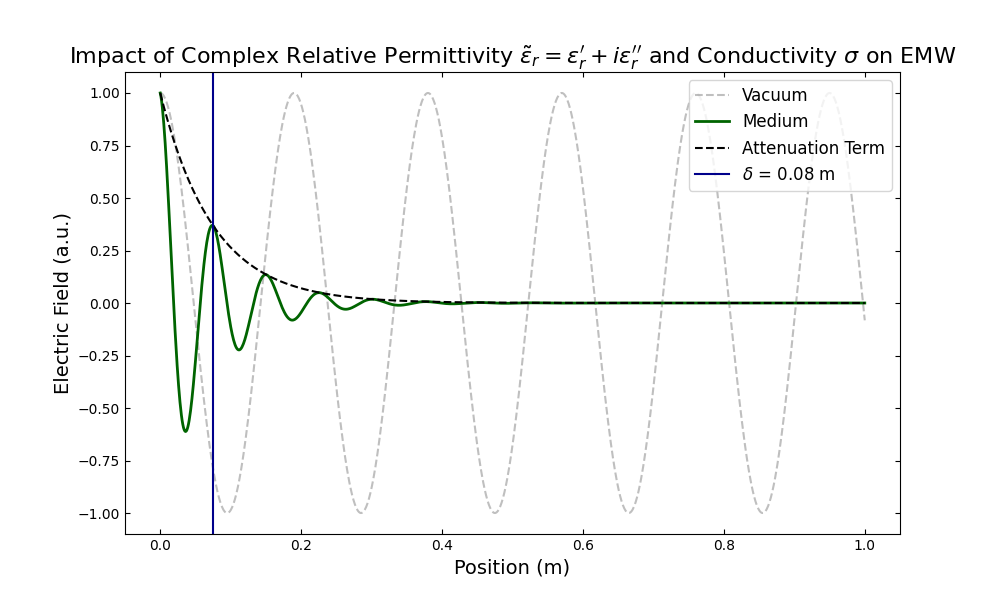

In [4]:
# Create the initial figure
fig, ax = plt.subplots(figsize=(10, 6))
ax.tick_params(axis='both', which='both', direction = 'in', top=True, bottom=True, left=True, right=True)

l0, = ax.plot(position, efield, '--', alpha=0.5, color='gray', label = 'Vacuum')

# Plot the electric field for the medium
l1, = ax.plot(position, efield, linewidth=2, color='darkgreen', label='Medium')

# Plot the electric field for vacuum
l2, = ax.plot(position, attenuator, '--', color='black', label='Attenuation Term')

# Add the vertical line for delta
l3, = ax.plot([delta, delta], [ax.get_ylim()[0], ax.get_ylim()[1]], '-', color='darkblue', label=rf'$\delta$ = {delta:.2f} m')

# Set plot labels and title
ax.set_xlabel('Position (m)', fontsize=14)
ax.set_ylabel('Electric Field (a.u.)', fontsize=14)
ax.set_title(r'Impact of Complex Relative Permittivity $\tilde{\epsilon}_r = \epsilon_r^{\prime} + i\epsilon_r^{\prime\prime}$ and Conductivity $\sigma$ on EMW', fontsize=16)

# Customize legend
ax.legend(loc='upper right', fontsize=12)

# Create sliders and interactive widgets with LaTeX descriptions
slider_permittivity_real = FloatSlider(value=5.000, min=1.000, max=10.000, step=0.001, description=r"$\epsilon_r'$")
slider_permittivity_imag = FloatSlider(value=50.000, min=0.000, max=100.000, step=0.001, description=r"$\epsilon_r''")
slider_conductivity = FloatSlider(value=0.500, min=0.000, max=1.000, step=0.001, description=r"$\sigma$")
slider_time = FloatSlider(value=0.000, min=0.000, max=1.000, step=0.001, description=r"time [s]")

# Create a slider for the vertical line position
slider_vertical_line = FloatSlider(value=2.0, min=0.0, max=10.0, step=0.1, description='Vertical Line Position')

# Create an interactive widget
@interact(rel_permittivity_real=slider_permittivity_real, rel_permittivity_imag=slider_permittivity_imag, conductivity=slider_conductivity, time = slider_time, vline_pos=slider_vertical_line)
def update_plot(rel_permittivity_real, rel_permittivity_imag, conductivity, time):
    updated_efield_vacuum = emw(x=position, t=time, lambda_0=wavelength, eps_prime=1, eps_double_prime=0, sigma=0)
    updated_efield_medium = emw(x=position, t=time, lambda_0=wavelength, eps_prime=rel_permittivity_real, eps_double_prime=rel_permittivity_imag, sigma=conductivity)
    updated_attenuation_term = attenuation_term(x=position, lambda_0=wavelength, eps_double_prime=rel_permittivity_imag, sigma=conductivity)
    updated_delta = penetration_depth(k_double_prime(lambda_0=wavelength, eps_double_prime=rel_permittivity_imag, sigma=conductivity))
    
    l0.set_ydata(updated_efield_vacuum)
    l1.set_ydata(updated_efield_medium)
    l2.set_ydata(updated_attenuation_term)
    
    # Update the position of the vertical line for delta
    l3.set_xdata([updated_delta, updated_delta])
    
    # ax.relim()
    # ax.autoscale_view()
    l3.set_xdata([updated_delta, updated_delta])

    # Update the legend entry for l3
    l3.set_label(rf'$\delta$ = {updated_delta:.2f} m')

    # Update the legend
    ax.legend(loc='upper right', fontsize=12)
    fig.canvas.draw_idle()



# Exercise 1.2: Polarization

The polarization of an electromagnetic wave describes the orientation of the electric field vector. This electric field vector is the sum of two contributions. Assume an EMW with $\vec{k} = k\hat{e}_z$, then the electric field vector can be written as:

$\vec{E}(t) = \vec{E}_x \cdot \cos\left(\omega t\right) + \vec{E}_y \cdot \cos\left(\omega t + \phi\right)$

*Note, the position dependency has been dropped here, as the time dependency is sufficient to understand the phenomenon of polarization and further because it simplifies the problem.*

The first term describes the oscillating electric field part in $x$-direction, the second in $y$-direction. Depending on the phase offset $\phi$ between the two oscillating electric field parts, the polarization of the emw is different.

There are three different types of polarization:
* linear: $\phi = n \cdot \pi$, with $n \in \mathbb{Z}$
* circular: $\phi = \dfrac{\pi}{2} + n \cdot \pi$, with $n \in \mathbb{Z}$
* elliptical: $\phi \neq n \cdot \pi$, with $n \in \mathbb{Z}$

## 1.2.1 Why is it meaningful to specify the polarization of an electromagnetic wave?
* The polarization of an emw is meaningful, because it describes the orientation of the electric field vector (and thus the magnetic field vector, too)
* When detecting an incident emw, knowledege of its polarization is important to understand how or if it will interact with the detector
* When an emw interacts with matter (e.g. refraction, reflection, ...) its polarization changes. If the initial poalrization is known, parts of the signal which correspond to interaction with matter can be identified and thus the material can be characterized
* Polarization is a fundamental porperty of an emw, just as amplitude or phase. Thus, it is important to know the polarization of an emw to fully understand it

## 1.2.1.1 Why is this not meaningful when talking about sound-waves?
* Sound-waves are longitudinal waves, meaning that the oscillation is in the direction of propagation. Thus, the oscillation is not in a plane, but rather in a line. Thus, the concept of polarization is not meaningful for sound-waves.


## 1.2.2 Which parameters can be used to characterize the state of polarization of a wave?
* The state of polarization of an emw can be characterized by the amplitude and phase of the oscillating electric field parts in $x$- and $y$-direction, i.e. $\vec{E}_x$, $\vec{E}_y$ and $\phi$.


## 1.2.3 Is the state of polarization important when talking about interference-eﬀects between two waves?
* Yes, the state of polarization is important when talking about interference effects between two waves, because the interference effects depend on the phase difference between the two waves. Thus, the state of polarization is important to understand the interference effects.

interactive(children=(FloatSlider(value=0.0, description='Time [s]', max=62.83185307179586), FloatSlider(value…

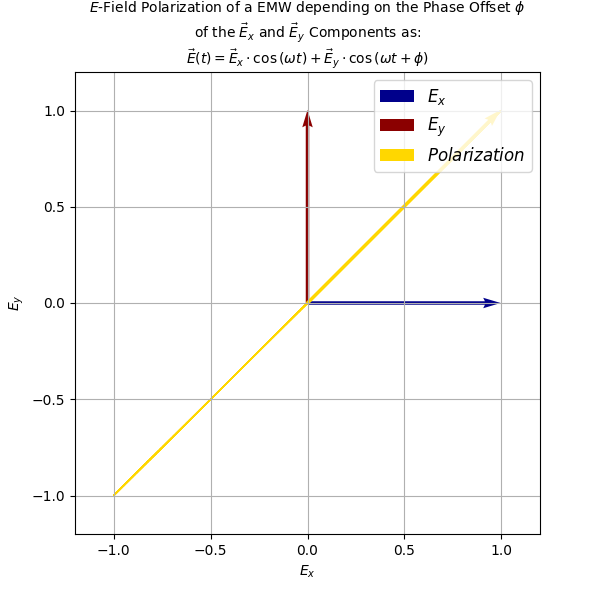

In [5]:
# Create the initial figure
fig, ax = plt.subplots(figsize=(6, 6))
ax.grid()

def cosine(t: float, omega: float, phi: float = 0):
    return np.cos(omega * t + phi)

# Initial time and phase
t_initial = 0
phi_initial = 0

# Create sliders to control time and phase
time_slider = FloatSlider(value=t_initial, min=0, max=20 * np.pi, step=0.1, description='Time [s]')
phi_slider = FloatSlider(value=phi_initial, min=0, max=2 * np.pi, step=0.01, description=r'$\phi$ [rad]')

origin = [0, 0]
efield_x = [1, 0]
efield_y = [0, 1]

ex = ax.quiver(*origin, efield_x[0], efield_x[1], units='xy', scale=1, color='darkblue', linewidth=2, label=r'$E_x$')
ey = ax.quiver(*origin, efield_y[0], efield_y[1], units='xy', scale=1, color='darkred', linewidth=2, label=r'$E_y$')
polarization = ax.quiver(*origin, efield_x[0] + efield_y[0], efield_x[1] + efield_y[1], units='xy', scale=1, color='gold', linewidth=2, label=r'$Polarization$')
shape = [[cosine(t=t, omega=1), cosine(t=t, omega=1, phi=phi_initial)] for t in np.linspace(0, 2 * np.pi, 1000)]
pol_shape = ax.add_patch(mpatches.Polygon(shape, color='gold', linestyle = 'dotted', closed = True, fill = False))

ax.set_title(r'$\vec{E}$-Field Polarization of a EMW depending on the Phase Offset $\phi$' + '\n' + r'of the $\vec{E}_x$ and $\vec{E}_y$ Components as:' +  '\n' r'$\vec{E}(t) = \vec{E}_x \cdot \cos\left(\omega t\right) + \vec{E}_y \cdot \cos\left(\omega t + \phi\right)$', fontsize=10)
ax.set_xlim(-1.2, 1.2)
ax.set_ylim(-1.2, 1.2)
ax.set_xlabel(r'$E_x$')
ax.set_ylabel(r'$E_y$')
ax.legend(loc='upper right', fontsize=12)
# plt.tight_layout()

@interact(time=time_slider, phi=phi_slider)
def update_cosine(time, phi):
    updated_efield_x = [cosine(t=time, omega=1), 0]
    updated_efield_y = [0, cosine(t=time, omega=1, phi=phi)]
    updated_shape = [[cosine(t=t, omega=1), cosine(t=t, omega=1, phi=phi)] for t in np.linspace(0, 20 * np.pi, 1000)]
    ex.set_UVC(updated_efield_x[0], updated_efield_x[1])
    ey.set_UVC(updated_efield_y[0], updated_efield_y[1])
    polarization.set_UVC(updated_efield_x[0] + updated_efield_y[0], updated_efield_x[1] + updated_efield_y[1])
    pol_shape.set_xy(updated_shape)
    fig.canvas.draw_idle()



# Exercise 1.3: Interference Patterns

When two electromagnetic waves with the same frequency and amplitude interfere, the resulting electric field is given as the superposition of both waves. Depending on the phase difference between the two waves, the resulting electric field can be constructive or destructive. The phase difference between the two waves is given as $\phi = \phi_2 - \phi_1$, where $\phi_1$ and $\phi_2$ are the phases of the two waves. 

Accodring to Huygen's Principle, each point of a wavefront can be regarded as a source of a new sphereical wave. In the far field, the wavefront effectively is a plane. If such a plane wave is subjected to diffraction, e.g. by the wave passing through a slit, behind the slit a new wavefront is formed, which is spherical. As from each point of the plane wavefront passign through the slit a new spherical wave obtained, these spherical waves interferere with each other. This phenomenon gives rise to an interference pattern, which is usually observed in the farfield and expressed as a function of the angle relative to the direction of propagation of the plane wave. Such interference patterns contain information about the width of the slit, the amount of slits and the distance between the slits. This information can be extracted from the interference pattern by analyzing the recorded intensity distribution.




## 1.3.1 How can the appearance of the interference-pattern be explained in terms of an approximation formula?

In the far field, the resuliting distribution of intensisity (= diffraction pattern) of the double slit can be approximated by the following formula:

$I(\theta) = I_0 \cdot \mathrm{sinc}^2\left(\dfrac{\pi d}{\lambda}\sin\theta\right) \cdot \cos^2\left(\dfrac{\pi d}{\lambda}\sin\theta\right)$

where $I_0$ is the intensity of the incident plane wave, $d$ is the distance between the slits and $\lambda$ is the wavelength of the incident plane wave. The intensity distribution is a function of the angle $\theta$ relative to the direction of propagation of the incident plane wave.

Minima can be found at $\theta = \pm \arcsin\left(\dfrac{m\lambda}{d}\right)$, with $m \in \mathbb{Z}$, while maxima can be found at $\theta = \pm \arcsin\left(\dfrac{m\lambda}{d}\right) + \dfrac{\pi}{2}$, with $m \in \mathbb{Z}$.



## 1.3.2 In which region is the approximate formula applicable? How are the boundaries of this region deﬁned?
* The approximate formula is applicable in the far field, i.e. for large distances from the slit. The boundaries of this region are defined by the Fraunhofer condition: $z \gg \dfrac{a^2}{\lambda}$, where $z$ is the distance from the slit, $a$ is the width of the slit and $\lambda$ is the wavelength of the emw.


## 1.3.3 What does the generated interference-pattern tell us if we replace the sources by detectors that are both equally sensitive to radiation incoming from all directions?

* Due to reciprocity, the resulting signal by combining the two detector signals would be of the same kind as the diffraction pattern observed in the far field of two sources. 
* Due to the phase difference of the incident signal on the two detectors (as they are lcoated at different positions), this phase information contains information about the direction, in which the uniformly emitting source is located.

$\Rightarrow$ The interference pattern obtained, by employing multiple detectors, can be used to determine the direction of the source, which is emitting uniformly in all directions.

In [6]:
def double_slit_diffr_pat(theta: float, lambda_0: float, slit_distance: float, initial_intensity: Optional[float] = 1) -> float:
    '''
    Function describing the resulting interference pattern of a EMW passing through a diffraction grating.
    Parameters:
    -----------
    theta: float
        Angle in rad
    lambda_0: float
        Wavelength in m
    slit_distance: float
        Distance between the slits in m    
    initial_intensity: float, optional
        Initial intensity of the EMW, default is 1

    Returns:
    --------
    float
    '''
    return initial_intensity * np.sinc(np.pi * slit_distance * np.sin(theta) / lambda_0)**2 * np.cos(np.pi * slit_distance * np.sin(theta) / lambda_0)**2

thetas = np.linspace(-np.pi / 2, np.pi / 2, 1000)


interactive(children=(FloatSlider(value=0.19, description='$\\lambda$ (m)', max=1.0, step=0.001), FloatSlider(…

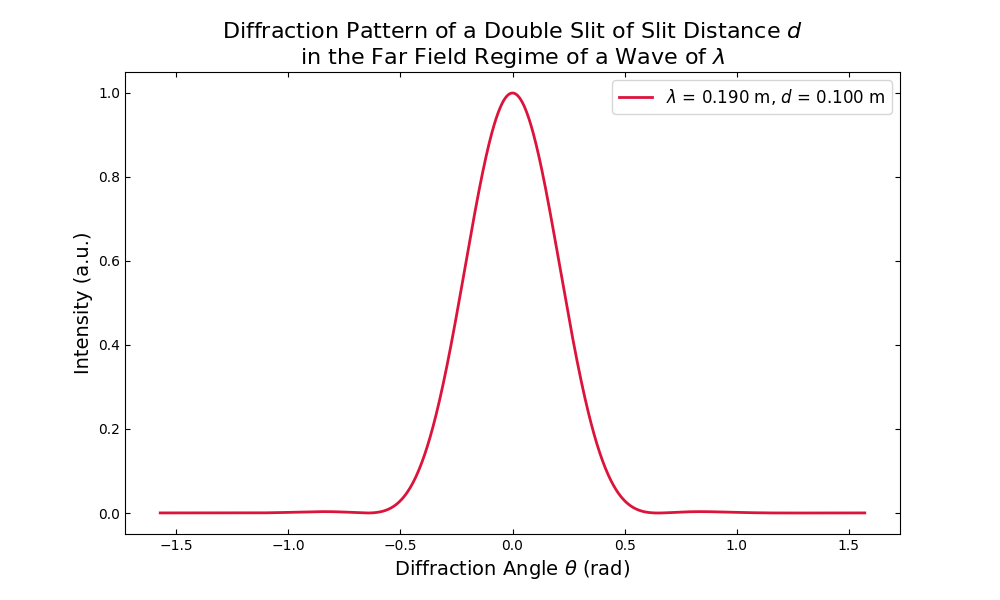

In [7]:
# Create the initial figure
fig, ax = plt.subplots(figsize=(10, 6))
ax.tick_params(axis='both', which='both', direction = 'in', top=True, bottom=True, left=True, right=True)

l0, = ax.plot(thetas, double_slit_diffr_pat(thetas, lambda_0=0.19, slit_distance=0.1), linewidth = 2, color = 'crimson', label = fr'$\lambda$ = 0.19 m, $d$ = 0.1 m')

# Set plot labels and title
ax.set_xlabel(r'Diffraction Angle $\theta$ (rad)', fontsize=14)
ax.set_ylabel('Intensity (a.u.)', fontsize=14)
ax.set_title(r'Diffraction Pattern of a Double Slit of Slit Distance $d$' + '\n' + r'in the Far Field Regime of a Wave of $\lambda$', fontsize=16)

# Customize legend
ax.legend(loc='upper right', fontsize=12)

# Create sliders and interactive widgets with LaTeX descriptions
slider_wavelength = FloatSlider(value=0.19, min=0.000, max=1.000, step=0.001, description=r"$\lambda$ (m)")
slider_slit_width = FloatSlider(value=0.1000, min=0.000, max=1.000, step=0.001, description=r"$d$ (m)")

# Create an interactive widget
@interact(wavelength=slider_wavelength, slit_width=slider_slit_width)
def update_plot(wavelength, slit_width):
    updated = double_slit_diffr_pat(thetas, lambda_0=wavelength, slit_distance=slit_width)
    
    l0.set_ydata(updated)
    l0.set_label(fr'$\lambda$ = {wavelength:.3f} m, $d$ = {slit_width:.3f} m')

    # Update the legend
    ax.legend(loc='upper right', fontsize=12)

    
    ax.relim()
    ax.autoscale_view()

    fig.canvas.draw_idle()



# 1.4 Blackbody radiation

A blackbody is an idealized physical body that absorbs all incident electromagnetic radiation, regardless of frequency or angle of incidence. A blackbody is also a perfect emitter of radiation, meaning that it emits radiation at all frequencies. Further, such a black body is in thermodynamic equilibrium with its environment. The radiation emitted by a blackbody is called blackbody radiation. The spectrum of blackbody radiation is continuous and depends only on the temperature of the blackbody. The spectrum of blackbody radiation is given by Planck's law:

$I(\nu, T) = \dfrac{2 h \nu^3}{\mathrm{c}^2} \cdot \dfrac{1}{\exp\left(\dfrac{h\nu}{k_B T}\right) - 1}$,     $\left[\dfrac{\mathrm{W}}{\mathrm{m}^2\mathrm{sr}\mathrm{Hz}}\right]$

$I(\lambda, T) = \dfrac{2 h \mathrm{c}^2}{\lambda^5} \cdot \dfrac{1}{\exp\left(\dfrac{h\mathrm{c}}{\lambda k_B T}\right) - 1}$,     $\left[\dfrac{\mathrm{W}}{\mathrm{m}^2\mathrm{sr}\mathrm{m}}\right]$

where $I(\lambda, T)$ is the spectral radiance of the blackbody, $h$ is Planck's constant, $c$ is the speed of light in vacuum, $\lambda$ is the wavelength, $k_B$ is Boltzmann's constant and $T$ is the temperature of the blackbody. 

Conversion from $I(\nu, T)$ to $I(\lambda, T)$ is done as: $I(\lambda, T) = \dfrac{1}{\nu^6\mathrm{c}} \cdot I(\nu, T)$.

## 1.4.1 Which approximations of Planck’s law exist and what are their validity conditions? Demonstrate the validity using your visualization.

The **Wien Radiation Law** is an approximation of Planck's law for the spectral radiance of a blackbody at high frequencies:

$I(\nu, T) \approx \dfrac{2 h \nu^3}{\mathrm{c}^2} \cdot \exp\left(-\dfrac{h\nu}{k_B T}\right)$,     $\left[\dfrac{\mathrm{W}}{\mathrm{m}^2\mathrm{sr}\mathrm{Hz}}\right]$ or $I(\lambda, T) \approx \dfrac{2 h \mathrm{c}^2}{\lambda^5} \cdot \exp\left(-\dfrac{h\mathrm{c}}{\lambda k_B T}\right)$,     $\left[\dfrac{\mathrm{W}}{\mathrm{m}^2\mathrm{sr}\mathrm{m}}\right]$

For low frequencies, the **Rayleigh-Jeans Law** is an approximation of Planck's law for the spectral radiance of a blackbody:

$I(\nu, T) = \dfrac{2 \nu^2 k_B T}{\mathrm{c}^2}$,     $\left[\dfrac{\mathrm{W}}{\mathrm{m}^2\mathrm{sr}\mathrm{Hz}}\right]$  or $I(\lambda, T) = \dfrac{2 \mathrm{c}k_B T}{\lambda^4}$,     $\left[\dfrac{\mathrm{W}}{\mathrm{m}^2\mathrm{sr}\mathrm{m}}\right]$

In [8]:
BOLTZMANN_CONSTANT = 1.380649e-23 # J/K
PLANCK_CONSTANT = 6.62607015e-34 # Js

In [9]:
def blackbody_nu(nu: float, temp: float) -> float:
    '''Calculates the spectral radiance of a black body in units of W/(m^2 * Hz * sr^2).

    Parameters:
    -----------
    nu: float
        Frequency in Hz
    temp: float
        Temperature in K
    Returns:
    --------
        float
    '''
    return 2 * PLANCK_CONSTANT * nu**3 / (SPEED_OF_LIGHT**2 * (np.exp(PLANCK_CONSTANT * nu / (BOLTZMANN_CONSTANT * temp)) - 1))

def blackbody_lambda(wavelength: float, temp: float) -> float:
    '''Calculates the spectral radiance of a black body in units of W/(m^3 * sr^2).

    Parameters:
    -----------
    lambda: float
        Wavelength in m
    temp: float
        Temperature in K
    Returns:
    --------
        float
    '''
    return 2 * PLANCK_CONSTANT * SPEED_OF_LIGHT**2 / (wavelength**5 * (np.exp(PLANCK_CONSTANT * SPEED_OF_LIGHT / (wavelength * BOLTZMANN_CONSTANT * temp)) - 1))


def wien_nu_max(temp: float) -> float:
    '''Approximates the frequency of the maximum spectral radiance of a black body in units of Hz, based on Wien's displacement law.

    Parameters:
    -----------
    temp: float
        Temperature in K

    Returns:
    --------
    freq: float
        Frequency in Hz
    '''
    return 5.87e10 * temp


def wien_lambda_max(temp: float) -> float:
    '''Approximates the wavelength of the maximum spectral radiance of a black body in units of m, based on Wien's displacement law.

    Parameters:
    -----------
    temp: float
        Temperature in K

    Returns:
    --------
    wavelength: float
        Wavelength in m
    '''
    return 2.87e-3 / temp


def wrl(nu: float, temp: float) -> float:
    '''Calculates the Wien Radiation Law in units of W/(m^2 * Hz * sr^2).

    Parameters:
    -----------
    nu: float
        Frequency in Hz
    temp: float
        Temperature in K

    Returns:
    --------
        float
    '''
    return 2 * PLANCK_CONSTANT * nu**3 / (SPEED_OF_LIGHT**2) * np.exp(-1 * PLANCK_CONSTANT * nu / (BOLTZMANN_CONSTANT * temp))


def rjl(nu: float, temp: float) -> float:
    '''Calculates the Rayleigh-Jeans Law in units of W/(m^2 * Hz * sr^2).

    Parameters:
    -----------
    nu: float
        Frequency in Hz
    temp: float
        Temperature in K

    Returns:
    --------
        float
    '''
    return 2 * BOLTZMANN_CONSTANT * temp * nu**2 / SPEED_OF_LIGHT**2

interactive(children=(FloatSlider(value=300.0, description='T (K)', max=100000.0, step=10.0), Output()), _dom_…

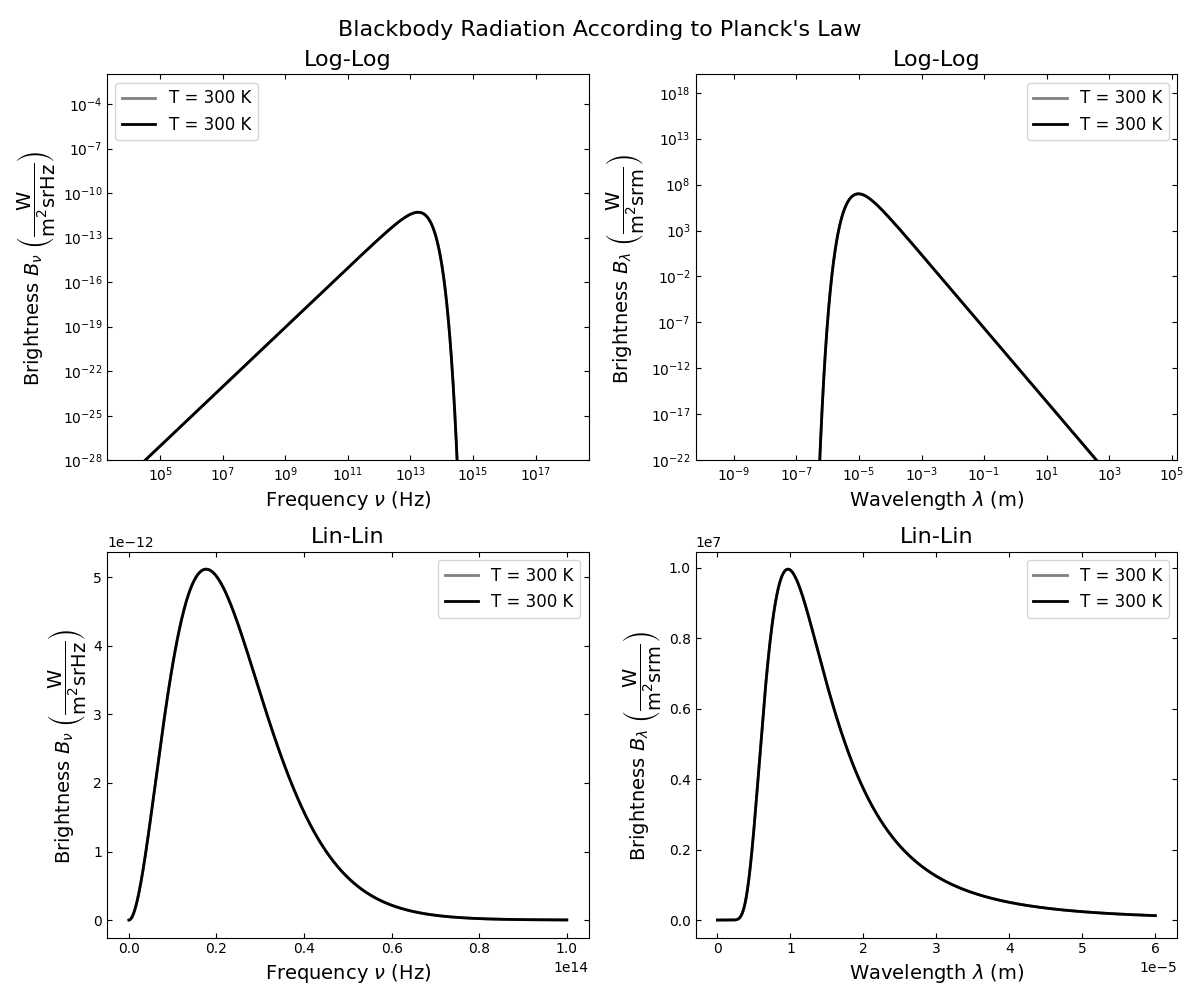

In [10]:
nu_num = int(1e5)

nus_log = np.logspace(4, 18, nu_num)
lambdas_log = SPEED_OF_LIGHT / nus_log

nus_lin = np.linspace(0, 10**14, nu_num)
lambdas_lin = np.linspace(0, 6e-5, nu_num)

initial_temp = 300
nu_max_initial = wien_nu_max(temp=initial_temp)
lambda_max_initial = wien_lambda_max(temp=initial_temp)

blackbody_nu_log = blackbody_nu(nu=nus_log, temp=initial_temp)
blackbody_lambda_log = blackbody_lambda(wavelength=lambdas_log, temp=initial_temp)
blackbody_nu_lin = blackbody_nu(nu=nus_lin, temp=initial_temp)
blackbody_lambda_lin = blackbody_lambda(wavelength=lambdas_lin, temp=initial_temp)


fig = plt.figure(figsize=(12, 10))
fig.suptitle("Blackbody Radiation According to Planck's Law", fontsize=16)

ax0 = fig.add_subplot(221)
ax0.tick_params(axis='both', which='both', direction = 'in', top=True, bottom=True, left=True, right=True)

l00, = ax0.plot(nus_log, blackbody_nu_log, linewidth=2, color='grey', label=r'T = 300 K')#, $\nu_{max}$ = ' + f'{nu_max_initial:.2e} Hz')
# m00, = ax0.plot([nu_max_initial, nu_max_initial], [0, np.max(blackbody_nu_log)], linewidth=2, color='grey', linestyle='dashed')

l01, = ax0.plot(nus_log, blackbody_nu_log, linewidth=2, color='black', label= r'T = 300 K')#, $\nu_{max}$ = ' + f'{nu_max_initial:.2e} Hz')
# m01, = ax0.plot([nu_max_initial, nu_max_initial], [0, np.max(blackbody_nu_log)], linewidth=2, color='black', linestyle='dashed')

ax0.set_xlabel(r'Frequency $\nu$ (Hz)', fontsize=14)
ax0.set_ylabel(r'Brightness $B_{\nu}$ $\left(\dfrac{\mathrm{W}}{\mathrm{m}^2\mathrm{sr}\mathrm{Hz}}\right)$ ', fontsize=14)
ax0.set_title("Log-Log", fontsize=16)
ax0.set_xscale('log')
ax0.set_yscale('log')
ax0.set_ylim(1e-28, 1e-2)

ax0.legend(loc = 'upper left', fontsize=12)


ax1 = fig.add_subplot(222)
ax1.tick_params(axis='both', which='both', direction = 'in', top=True, bottom=True, left=True, right=True)

l10, = ax1.plot(lambdas_log, blackbody_lambda_log, linewidth=2, color='grey', label= r'T = 300 K')#, $\lambda_{max}$ = ' + f'{lambda_max_initial:.2e} m')
# m10, = ax1.plot([lambda_max_initial, lambda_max_initial], [0, np.max(blackbody_lambda_log)], linewidth=2, color='grey', linestyle='dashed')

l11, = ax1.plot(lambdas_log, blackbody_lambda_log, linewidth=2, color='black', label='T = 300 K')#, $\lambda_{max}$ = ' + f'{lambda_max_initial:.2e} m')
# m11, = ax1.plot([lambda_max_initial, lambda_max_initial], [0, np.max(blackbody_lambda_log)], linewidth=2, color='black', linestyle='dashed')

ax1.set_xlabel(r'Wavelength $\lambda$ (m)', fontsize=14)
ax1.set_ylabel(r'Brightness $B_{\lambda}$ $\left(\dfrac{\mathrm{W}}{\mathrm{m}^2\mathrm{sr}\mathrm{m}}\right)$ ', fontsize=14)
ax1.set_title("Log-Log", fontsize=16)
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_ylim(1e-22, 1e20)

ax1.legend(loc = 'upper right', fontsize=12)

ax2 = fig.add_subplot(223)
ax2.tick_params(axis='both', which='both', direction = 'in', top=True, bottom=True, left=True, right=True)

l20, = ax2.plot(nus_lin, blackbody_nu_lin, linewidth=2, color='grey', label= 'T = 300 K')
l21, = ax2.plot(nus_lin, blackbody_nu_lin, linewidth=2, color='black', label= 'T = 300 K')

ax2.set_xlabel(r'Frequency $\nu$ (Hz)', fontsize=14)
ax2.set_ylabel(r'Brightness $B_{\nu}$ $\left(\dfrac{\mathrm{W}}{\mathrm{m}^2\mathrm{sr}\mathrm{Hz}}\right)$ ', fontsize=14)
ax2.set_title("Lin-Lin", fontsize=16)
ax2.xaxis.set_major_formatter(ScalarFormatter())
ax2.yaxis.set_major_formatter(ScalarFormatter())
ax2.legend(loc = 'upper right', fontsize=12)

ax3 = fig.add_subplot(224)
ax3.tick_params(axis='both', which='both', direction = 'in', top=True, bottom=True, left=True, right=True)

l30, = ax3.plot(lambdas_lin, blackbody_lambda_lin, linewidth=2, color='grey', label='T = 300 K')
l31, = ax3.plot(lambdas_lin, blackbody_lambda_lin, linewidth=2, color='black', label='T = 300 K')

ax3.set_xlabel(r'Wavelength $\lambda$ (m)', fontsize=14)
ax3.set_ylabel(r'Brightness $B_{\lambda}$ $\left(\dfrac{\mathrm{W}}{\mathrm{m}^2\mathrm{sr}\mathrm{m}}\right)$ ', fontsize=14)
ax3.set_title("Lin-Lin", fontsize=16)
ax3.xaxis.set_major_formatter(ScalarFormatter())
ax3.yaxis.set_major_formatter(ScalarFormatter())
ax3.legend(loc = 'upper right', fontsize=12)


slider_temp = FloatSlider(value=initial_temp, min=0, max=1e5, step=10, description=r'T (K)')


# Update function for all subplots
@interact(temperature=slider_temp)
def update_temperature(temperature):
    # Update data in all subplots using the new temperature
    data0_log = blackbody_nu(nus_log, temperature)
    data1_log = blackbody_lambda(lambdas_log, temperature)

    data0_lin = blackbody_nu(nus_lin, temperature)
    data1_lin = blackbody_lambda(lambdas_lin, temperature)

    nu_max = wien_nu_max(temp=temperature)
    lambda_max = wien_lambda_max(temp=temperature)
    
    l01.set_ydata(data0_log)
    l01.set_label(f'T = {int(temperature)} K')#, ' + r'$\nu_{max}$ = ' + f'{nu_max:.2e} Hz')
    # m01.set_xdata([nu_max, nu_max])
    # m01.set_ydata([ax0.get_ylim()[0], ax0.get_ylim()[1]])
    ax0.legend(loc='upper left', fontsize=12)

    l11.set_ydata(data1_log)
    l11.set_label(f'T = {int(temperature)} K')#, ' + r'$\lambda_{max}$ = ' + f'{lambda_max:.2e} m')
    # m11.set_xdata([lambda_max, lambda_max])
    # m11.set_ydata([ax1.get_ylim()[0], ax1.get_ylim()[1]])
    ax1.legend(loc='upper right', fontsize=12)

    l21.set_ydata(data0_lin)
    l21.set_label(f'T = {int(temperature)} K')
    ax2.legend(loc='upper right', fontsize=12)

    l31.set_ydata(data1_lin)
    l31.set_label(f'T = {int(temperature)} K')
    ax3.legend(loc='upper right', fontsize=12)

    ax0.relim()
    ax0.autoscale_view()
    ax1.relim()
    ax1.autoscale_view()
    ax2.relim()
    ax2.autoscale_view()
    ax3.relim()
    ax3.autoscale_view()
    
    # Redraw the figure
    fig.canvas.draw_idle()

plt.tight_layout()


interactive(children=(FloatSlider(value=300.0, description='T (K)', max=800.0, step=10.0), Output()), _dom_cla…

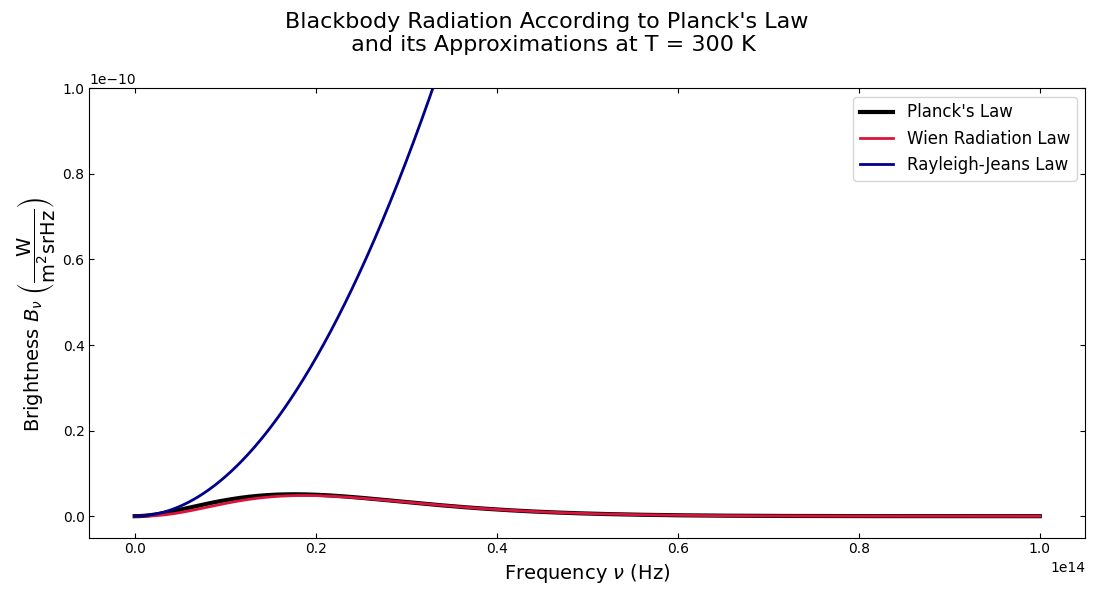

In [11]:
fig = plt.figure(figsize=(11, 6))

initial_temp = 300
nus_lin = np.linspace(0, 10**14, nu_num)

planck = blackbody_nu(nus_lin, temp=initial_temp)


wien = wrl(nus_lin, temp=initial_temp)
rayleigh= rjl(nus_lin, temp=initial_temp)

fig.suptitle(f"Blackbody Radiation According to Planck's Law \n and its Approximations at T = {initial_temp} K", fontsize=16)

ax = fig.add_subplot(111)
ax.tick_params(axis='both', which='both', direction = 'in', top=True, bottom=True, left=True, right=True)

l0, = ax.plot(nus_lin, planck, linewidth=3, color='black', label= "Planck's Law")
ax.set_ylim(-0.05e-10, 1e-10)
l1, = ax.plot(nus_lin, wien, linewidth=2, color='crimson', label= 'Wien Radiation Law')
l2, = ax.plot(nus_lin, rayleigh, linewidth=2, color='darkblue', label= 'Rayleigh-Jeans Law')


ax.set_xlabel(r'Frequency $\nu$ (Hz)', fontsize=14)
ax.set_ylabel(r'Brightness $B_{\nu}$ $\left(\dfrac{\mathrm{W}}{\mathrm{m}^2\mathrm{sr}\mathrm{Hz}}\right)$ ', fontsize=14)
ax.xaxis.set_major_formatter(ScalarFormatter())
ax.yaxis.set_major_formatter(ScalarFormatter())
ax.legend(loc = 'upper right', fontsize=12)

slider_temp = FloatSlider(value=initial_temp, min=0, max=8e2, step=10, description=r'T (K)')


# Update function for all subplots
@interact(temperature=slider_temp)
def update_temperature(temperature):
    # Update data in all subplots using the new temperature
    planck = blackbody_nu(nus_lin, temperature)
    wien = wrl(nus_lin, temperature)
    rayleigh= rjl(nus_lin, temperature)

    l0.set_ydata(planck)
    l1.set_ydata(wien)
    l2.set_ydata(rayleigh)

    fig.suptitle(f"Blackbody Radiation According to Planck's Law \n and its Approximations at T = {int(temperature)} K", fontsize=16)

    # ax.relim()
    # ax.autoscale_view()

    
    # Redraw the figure
    fig.canvas.draw_idle()

plt.tight_layout()


# 1.4 Antenna Directivity

## 1.4.1 How can the design of a microwave antenna control its directivity?

As seen from the double slit experiment above, combining two point sources results in an interference pattern in the far field. This intensity distribution depends on the distance of the detector from the source-plane, the wavelength, 'point source width' (= slit width) and the distance between the two point sources (= slits). The resulting interferene patterns above were calculated based on an assumption: that all point sources were in phase, i.e. they emitted temporally coherent emws. Thus, the maximum of the interference pattern was found right in the middle between the two point sources. 


If the two point sources were not in phase, the maximum of the interference pattern would be shifted. By varying the amount of point sources, their distances and the phase with which each of them emits emws, the resulting interference pattern can be controlled. This is the basic principle of a phase array antenna.


**Note:**
*Other paramenters controlling this pattern would be the wavelentgh $\lambda_i$ and amplitude $A_{0,i}$ of point source $i$. We will assume that each point source emits radiation of same wavelength, polarization and amplitude.*

Assume $m=N$ emitters, evenly spaced at distances $d$ in a linear array of total length $l = (N-1)d$. Each emitter emtis a spherical wave: $\vec{E} \propto \dfrac{\exp\left(i\vec{k}\vec{r}\right)}{4\pi r}$. This wave corresponds to an **Array Factor AF** of 1. If in the far field the waves emitted by two neighboring emitter $m$ and $m+1$ are probed at an angle $\theta$ relative to the array ($\theta = 0 \rightarrow$ parrallel to array, $\theta = 0.5\pi \rightarrow$ perpendicular), the phase difference is $\phi = kd\cos\theta$. The overall resultign field is the superposition of all $N-1$ fields emitted by the $N-1$ emitters and the array factor thus is given as:

$AF = \sum_{m=0}^{N-1}\exp\left(im\psi\right), \psi = kd\cos\theta$

Multiplying both sides of the above equation, let's call it eq.1, by $\exp\elft(i\psi\right) (calling the result eq.2) and then subtracting eq.2 from eq.1 yields:

$AF\left(1-\exp\left(i\psi\right)\right) = 1-\exp\left(i\psi N\right)$

Rearranging this expression yields:

$ AF = \exp\left(i\dfrac{\psi}{2}\left(N-1\right)\right) \cdot \dfrac{\sin\left(N\dfrac{\psi}{2}\right)}{\sin\left(\dfrac{\psi}{2}\right)}$

To normalize, the maximum of $AF$ needs to be found. To do so, $AF$ is expressed as a series expansion at $\psi = 0$ and only the first term is kept:

$ AF = N + O\left(\psi\right)$

Thus, the maximum of AF is $N$.

Normalizing $AF$ finally yields (under neglectance of the phase factor):

$ f\left(\psi\right) = \dfrac{AF\left(\psi\right)}{N} = \dfrac{\sin\left(N\dfrac{\psi}{2}\right)}{N\sin\left(\dfrac{\psi}{2}\right)}$

Further assuming that $d \ll \lambda$, this expression can be simplified by using the small angle approximation for the sine in the denominator:

$f\left(\psi\right) = \mathrm{sinc}\left(N\dfrac{\psi}{2}\right) \Rightarrow f\left(\theta\right) = \mathrm{sinc}\left(\dfrac{Nkd\cos\theta}{2}\right)$

The normalized radiation intensity produced by such a linear array is:

$U\left(\psi\right) = \left|AF\left(\psi\right)\right|^2 = \mathrm{sinc}\left(\dfrac{Nkd\cos\theta}{2}\right)^2$

So far, the width of the main maximum (maximum of zeroth order) of the resulting interference pattern in the far field was inversely proportional to the amount of emitters and its position constant at $\theta = 0$.

To introduce a steerable main maximum, each emitter shall emit its spherical wave of same wavelength and amplitude at a slightly altered phase $\alpha$, as compared to its previous neighbor: $I_m = \exp\left(im\alpha\right)$.

Therefore, $\psi$ and consequently $AF$ is to be modified as follows:

$AF = \sum_{m=0}^{N-1}\exp\left(im\psi\right), \tilde{\psi} = kd\cos\theta + \alpha$

This phase $\alpha$ introduces a linear phase gradient over the whole antenna array. Its value steers the direction of the itnerference patterns' main maximum.

Finally, the normalized radiation intensity produced by such a linear phased array is:

**$U\left({\theta, k, N, d, \alpha}\right) = \mathrm{sinc}\left(\dfrac{Nkd\cos\theta + \alpha}{2}\right)^2$**



## 1.4.2 What are the analogies to the concept for hearing audio waves?

## 1.4.3 What are the fundamental diﬀerences between microwave-/audio-systems and optical systems?

* Audio-System: longitudinal waves, $\vec{A} \parallel \vec{k}$, particles are phonons
* Optical System: transversal waves, $\vec{A} \perp \vec{k}, A = E, B$, particles are photons

In [60]:
def phased_array(thetas: float, wavelength: float, number_of_emitters: int, emitter_phase_offset: float, emitter_distance: Optional[float] = wavelength / 2) -> float:
    '''Calculates the resulting radiation pattern of a linear phased antenna array.
    
    Parameters:
    -----------
    thetas: float
        Angle `theta` in rad
    wavelength: float
        Wavelength `lambda` in m
    number_of_emitters: int
        Number of emitters `N` in the array
    emitter_phase_offset: float
        Phase offset `alpha` of the emitters
    emitter_distance: float, optional
        Distance between the emitters `d`, default is wavelength / 2
        
    Returns:
    --------
    float
        Radiation pattern `U` of the antenna array
    '''    
    
    return np.sinc((number_of_emitters * (2 * np.pi / wavelength) * emitter_distance * np.cos(thetas) + emitter_phase_offset) / 2)**2


interactive(children=(FloatSlider(value=1.0, description='N', max=30.0, min=1.0, step=1.0), FloatSlider(value=…

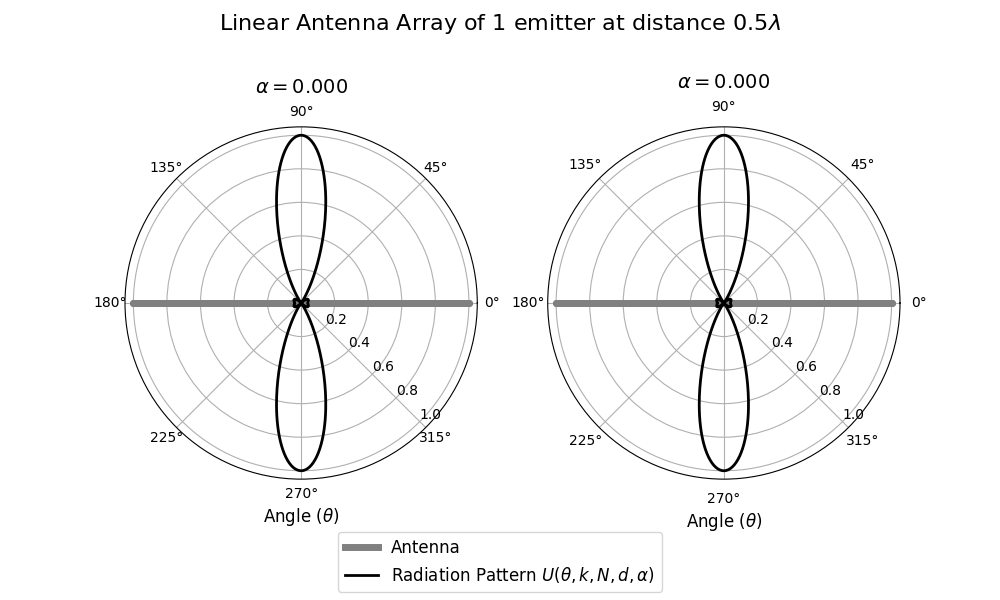

In [61]:
thetas = np.linspace(-np.pi, np.pi, 1000)
wavelength = 0.19 # m, L1-band GPS with f = 1575.42 MHz
number_of_emitters = 1
emitter_phase_offset = 0
emitter_distance = wavelength / 2

pattern = phased_array(thetas, wavelength, number_of_emitters, emitter_phase_offset, emitter_distance)

def antenna_visual(axis, thickness, legend = None):
    thetas = [0, 0, np.pi, np.pi]
    rs = [0, 1, 1, 0]
    ll, = axis.plot(thetas, rs, linewidth = thickness, color = 'grey')
    if legend:
        ll.set_label(legend)

fig = plt.figure(figsize=(10, 6))
fig.suptitle(fr'Linear Antenna Array of {int(number_of_emitters)} emitter at distance {(emitter_distance / wavelength):.1f}$\lambda$', fontsize = 16)

ax = fig.add_subplot(121, projection='polar')
ax.set_title(rf'$\alpha = {emitter_phase_offset:.3f}$', va='bottom', fontsize = 14)
ax.tick_params(axis='both', which='both', direction = 'in', top=True, bottom=True, left=True, right=True)
antenna_visual(ax, 5)
ax.plot(thetas, pattern, linewidth = 2, color = 'black')
ax.set_rlabel_position(315)
ax.set_xlabel(r'Angle ($\theta$)', fontsize = 12)

ax1 = fig.add_subplot(122, projection='polar')
ax1.set_title(rf'$\alpha = {emitter_phase_offset:.3f}$', va='bottom', fontsize = 14)
ax.tick_params(axis='both', which='both', direction = 'in', top=True, bottom=True, left=True, right=True)
antenna_visual(ax1, 5)
ax1.plot(thetas, pattern, linewidth = 2, color = 'black')
ax1.set_rlabel_position(315)
ax1.set_xlabel(r'Angle ($\theta$)', fontsize = 12)


slider_number_of_emitters = FloatSlider(value=1, min=1, max=30, step=1, description = 'N')
slider_emitter_distance = FloatSlider(value = wavelength / 2, min = 0.000, max = 10 * wavelength, step = wavelength / 10, description = 'd')
slider_phase_offset = FloatSlider(value = 0, min = -10.000 * np.pi, max = 10.000 * np.pi, step = np.pi / 8, description = 'alpha')

@interact(number_of_emitters=slider_number_of_emitters, emitter_distance=slider_emitter_distance, emitter_phase_offset = slider_phase_offset)
def update_plot(number_of_emitters, emitter_distance, emitter_phase_offset):
    updated_array = phased_array(thetas, wavelength, number_of_emitters, 0, emitter_distance)
    updated_phase_array = phased_array(thetas, wavelength, number_of_emitters, emitter_phase_offset, emitter_distance)

    ax.clear()
    antenna_visual(ax, 5)
    ax.plot(thetas, updated_array, linewidth = 2, color = 'black')
    ax.set_title(rf'$\alpha = {0:.3f}$', va='bottom', fontsize = 14)
    ax.set_rlabel_position(315)
    ax.set_xlabel(r'Angle ($\theta$)', fontsize = 12)

    ax1.clear()
    antenna_visual(ax1, 5, legend='Antenna')
    ax1.plot(thetas, updated_phase_array, linewidth = 2, color = 'black', label = r'Radiation Pattern $U\left(\theta, k, N, d, \alpha\right)$')
    ax1.set_title(rf'$\alpha = {emitter_phase_offset:.3f}$', va='bottom', fontsize = 14)
    ax1.set_rlabel_position(315)
    ax1.set_xlabel(r'Angle ($\theta$)', fontsize = 12)

    fig.suptitle(fr'Linear Antenna Array of {int(number_of_emitters)} emitter at distance {(emitter_distance / wavelength):.1f}$\lambda$', fontsize = 16)
    fig.legend(loc='lower center', fontsize=12)
    fig.canvas.draw_idle()
